# 1. 데이터 & 라이브러리 import

In [4]:
import pandas as pd
import seaborn as sns

# model
import lightgbm as gbm

In [5]:
test = pd.read_csv('/content/drive/MyDrive/KaggleStudy/movies_test.csv')
train = pd.read_csv('/content/drive/MyDrive/KaggleStudy/movies_train.csv')
submission = pd.read_csv('/content/drive/MyDrive/KaggleStudy/submission.csv')

In [6]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# 2. 데이터 EDA

In [7]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


<Axes: >

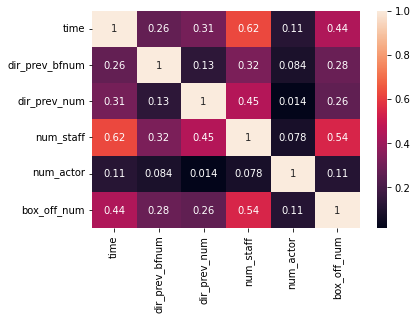

In [12]:
sns.heatmap(train.corr(), annot=True)
# num_staff, time이 상관계수가 큼

In [15]:
pd.isna(train).sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [18]:
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [21]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [22]:
train['dir_prev_bfnum'].fillna(0,inplace = True)

In [23]:
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [24]:
test['dir_prev_bfnum'].fillna(0,inplace = True)

In [25]:
test[test['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor


# 3. 모델링

### 1) regressor
- 연속적인 숫자 데이터만 다룸
- 숫자 데이터만 feature로

In [28]:
# 1. 데이터 나누기
features = ['time', 'dir_prev_bfnum', 'dir_prev_num' ,'num_staff', 'num_actor']
target = ['box_off_num']

In [31]:
X_train = train[features]
y_train = train[target]

In [33]:
X_test = test[features]
## y_test = test[target]

UsageError: Line magic function `%%` not found.


In [39]:
from lightgbm import LGBMRegressor

In [41]:
lgb = LGBMRegressor (n_estimators = 1000, random_state = 777)

In [42]:
lgb.fit(X_train,y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [43]:
y_pred = lgb.predict(X_test)

In [44]:
submission['box_off_num'] = y_pred

In [47]:
submission.to_csv("submission.csv",index=False)

In [45]:
submission

,title,box_off_num
0,용서는 없다,1.870618e+06
1,아빠가 여자를 좋아해,1.512095e+06
2,하모니,8.523003e+04
3,의형제,1.166090e+06
4,평행 이론,1.596969e+05
...,...,...
238,해에게서 소년에게,9.450393e+04
239,울보 권투부,6.183232e+05
240,어떤살인,1.513914e+06
241,말하지 못한 비밀,6.660875e+04


In [46]:
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.000000e+00,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.000000e+00,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7
